In [1]:
from DCLayers import *
from DCWidget import *
%matplotlib inline

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    


# DC Resistivity Data

Using the widgets contained in this notebook you will develop a better understand of what values are actually measured in a DC resistivity survey and how these measurements can be processed, plotted, inverted, and interpreted.

# Computing Apparent Resistivity

In practice we cannot measure the potentials everywhere, we are limited to those locations where we place electrodes. For each source (current electrode pair) many potential differences are measure between M and N electrode pairs to characterize the overall distribution of potentials. The widget below allows you visualize the potentials, electric fields, and current densities from a dipole source in a simple 2 layer model. For different electrode configurations you can measure the potential differences and see the calculated apparent resistivities. 

In a uniform halfspace the potential differences can be computed by summing up the potentials at each measurement point from the different current sources based on the following equations:

\begin{align}
    V_M = \frac{\rho I}{2 \pi} \left[ \frac{1}{AM} - \frac{1}{MB} \right] \\
    V_N = \frac{\rho I}{2 \pi} \left[ \frac{1}{AN} - \frac{1}{NB} \right] 
\end{align} 
where $AM$, $MB$, $AN$, and $NB$ are the distances between the corresponding electrodes. 

The potential difference $\Delta V_{MN}$ in a dipole-dipole survey can therefore be expressed as follows,
\begin{equation}
    \Delta V_{MN} = V_M - V_N = \frac{\rho I}{2 \pi} \left[ \frac{1}{AM} - \frac{1}{MB} - \frac{1}{AN} + \frac{1}{NB} \right]
\end{equation}
and the resistivity of the halfspace $\rho$ is equal to,
\begin{equation}
    \rho = \frac{\Delta V_{MN}}{I} \underbrace{2\pi \left[ \frac{1}{AM} - \frac{1}{MB} - \frac{1}{AN} + \frac{1}{NB} \right]^{-1}}_{G} = \frac{\Delta V_{MN}}{I} G
\end{equation}
In this equation $G$ is often referred to as the geometric factor. 

In the case were we are not in a uniform halfspace the above equation is used to compute the apparent resistivity ($\rho_a$) which is the resistivity of the uniform halfspace which best reproduces the measured potential difference.

In the top plot the location of the A electrode is marked by the red +, the B electrode is marked by the blue -, and the M/N potential electrodes are marked by the black dots. The $V_M$ and $V_N$ potentials are printed just above and to the right of the black dots. The calculted apparent resistivity is shown in the grey box to the right. The bottom plot shows the resistivity model from which the fields, potentials and current densities are computed. So patience may be required for the plots to update after parameters have been changed.

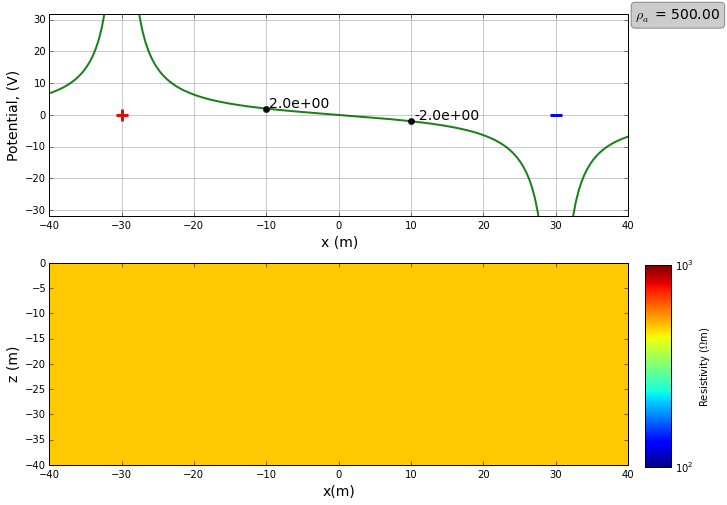

(<matplotlib.figure.Figure at 0x13accd68>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013AF44A8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013B10F98>], dtype=object))

In [2]:
app = plot_Layer_Potentials_app()
app;

# Building Pseudosections 

2D profiles are often plotted as pseudo-sections by extending $45^{\circ}$ lines downwards from the A-B and M-N midpoints and plotting the corresponding $\Delta V_{MN}$ or $\rho_a$ value at the intersection of these lines as shown in the second portion of the notebook. For pole-dipole or dipole-pole surveys the $45^{\circ}$ line is simply extended from the location of the pole. By using this method of plotting, the long offset electrodes plot deeper than those with short offsets. This provides a rough idea of the region sampled by each data point, but the vertical axis of a pseudo-section is not a true depth.

In the widget below the red dot marks the midpoint of the current dipole or the location of the A electrode location in a pole-dipole array while the green dots mark the midpoints of the potential dipoles or M electrode locations in a dipole-pole array. The blue dots then mark the location in the pseudo-section where the lines from Tx and Rx midpoints intersect and the data is plotted. By stepping through the Tx (current electrode pairs) using the slider you can see how the pseudo section is built up.

The figures shown below show how the points in a pseudo-section are plotted for pole-dipole, dipole-pole, and dipole-dipole arrays. The color coding of the dots match those shown in the widget.
<br />
<br />
<img src="./PoleDipole.png" style="width: 60%; height: 60%"> </img> 
<center>Basic skematic for a uniformly spaced pole-dipole array.
<br />
<br />
<br />
<img src="./DipolePole.png" style="width: 60%; height: 60%"> </img>
<center>Basic skematic for a uniformly spaced dipole-pole array. 
<br />
<br />
<br />
<img src="./DipoleDipole.png" style="width: 60%; height: 60%"> </img>
<center>Basic skematic for a uniformly spaced dipole-dipole array.
<br />


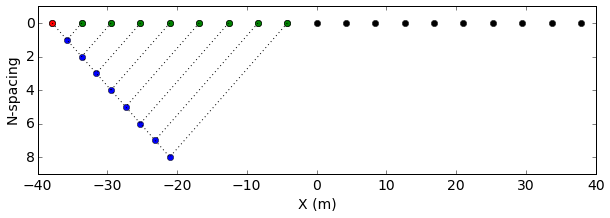

<function DCWidget.DipoleDipolefun>

In [3]:
MidpointPseudoSectionWidget()

# Inverting Data

TODO change default parameters so that they are not so close to the true parameters.

In this final widget you are able to forward model the apparent resistivity of a cylinder embedded in an otherwise uniform halfspace. Pseudo-sections of the apparent resistivity can be generated using dipole-dipole, pole-dipole, or dipole-pole arrays to see how survey geometry can distort the size, shape, and location of conductive bodies in a pseudo-section.  Due to distortion and artifacts present in pseudo-sections trying to interpret them directly is typically difficult and dangerous due to the risk of misinterpretation. Inverting the data to find a model which fits the observed data and is geologically reasonable should be standard practice.   

By systematically varying the model parameters and comparing the plots of observed vs. predicted apparent resistivity a parametric inversion can be preformed by hand to find the "best" fitting model. Normalized data misfits, which provide a numerical measure of the difference between the observed and predicted data, are useful for quantifying how well and inversion model fits the observed data. Since the manual inversion process can be difficult and time consuming even with small examples sure as the one presented here. Numerical optimization algorithms are typically utilized to minimized the data misfit and a model objective function, which information about the model structure and complexity, in order to find an optimal solution.

Definition of variables:<br />
rhohalf = resistivity of the halfspace<br />
rhosph = resistivity of the cylinder<br />
xc = x location of the clyinder centre<br />
zc = z location of the clyinder centre<br />
r = radius of the cylinder<br />
predmis: toggle which allow you to switch the bottom pannel from predicted apparent resistivity to normalized data misfit<br />
suveyType: toggle which allow you to switch between survey types.<br />

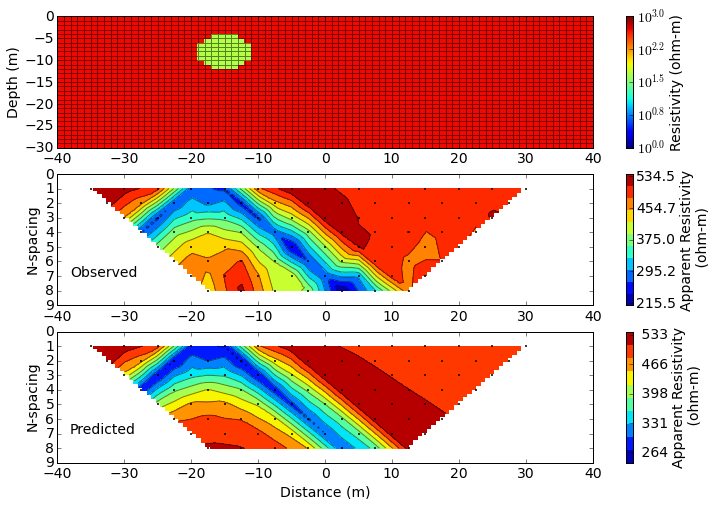

<function DCWidget.DC2DfwdWrapper>

In [4]:
app = DC2DfwdWidget()
app